# Preprocessing dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
file_path = "/content/drive/MyDrive/MLCW/cleaned_dataset.csv"
data = pd.read_csv(file_path)

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41174 entries, 0 to 41173
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41174 non-null  int64  
 1   job             41174 non-null  object 
 2   marital         41174 non-null  object 
 3   education       41174 non-null  object 
 4   housing         41174 non-null  object 
 5   loan            41174 non-null  object 
 6   contact         41174 non-null  object 
 7   month           41174 non-null  object 
 8   day_of_week     41174 non-null  object 
 9   campaign        41174 non-null  int64  
 10  pdays           41174 non-null  int64  
 11  previous        41174 non-null  int64  
 12  poutcome        41174 non-null  object 
 13  emp.var.rate    41174 non-null  float64
 14  cons.price.idx  41174 non-null  float64
 15  cons.conf.idx   41174 non-null  float64
 16  euribor3m       41174 non-null  float64
 17  nr.employed     41174 non-null 

In [5]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
print(data[numerical_columns].describe())

                age      campaign         pdays      previous  emp.var.rate  \
count  41174.000000  41174.000000  41174.000000  41174.000000  41174.000000   
mean      40.023583      2.567956    962.463035      0.173022      0.081865   
std       10.420578      2.770364    186.941469      0.494975      1.570899   
min       17.000000      1.000000      0.000000      0.000000     -3.400000   
25%       32.000000      1.000000    999.000000      0.000000     -1.800000   
50%       38.000000      2.000000    999.000000      0.000000      1.100000   
75%       47.000000      3.000000    999.000000      0.000000      1.400000   
max       98.000000     56.000000    999.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count    41174.000000   41174.000000  41174.000000  41174.000000  
mean        93.575713     -40.503070      3.621231   5167.032805  
std          0.578849       4.627877      1.734456     72.252395  
min         92.20100

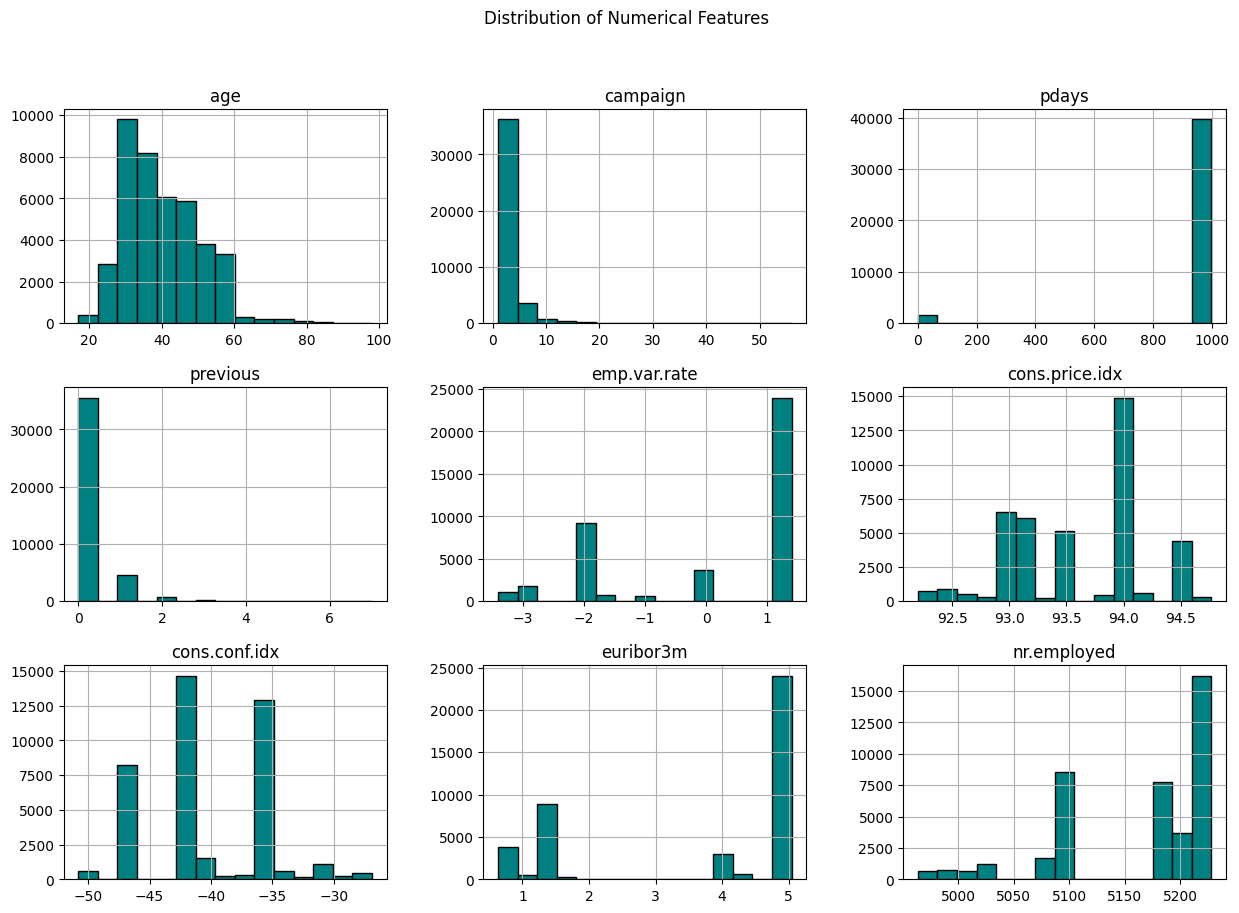

In [7]:
# Histogram for numerical features
data[numerical_columns].hist(bins=15, figsize=(15, 10), color='teal', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

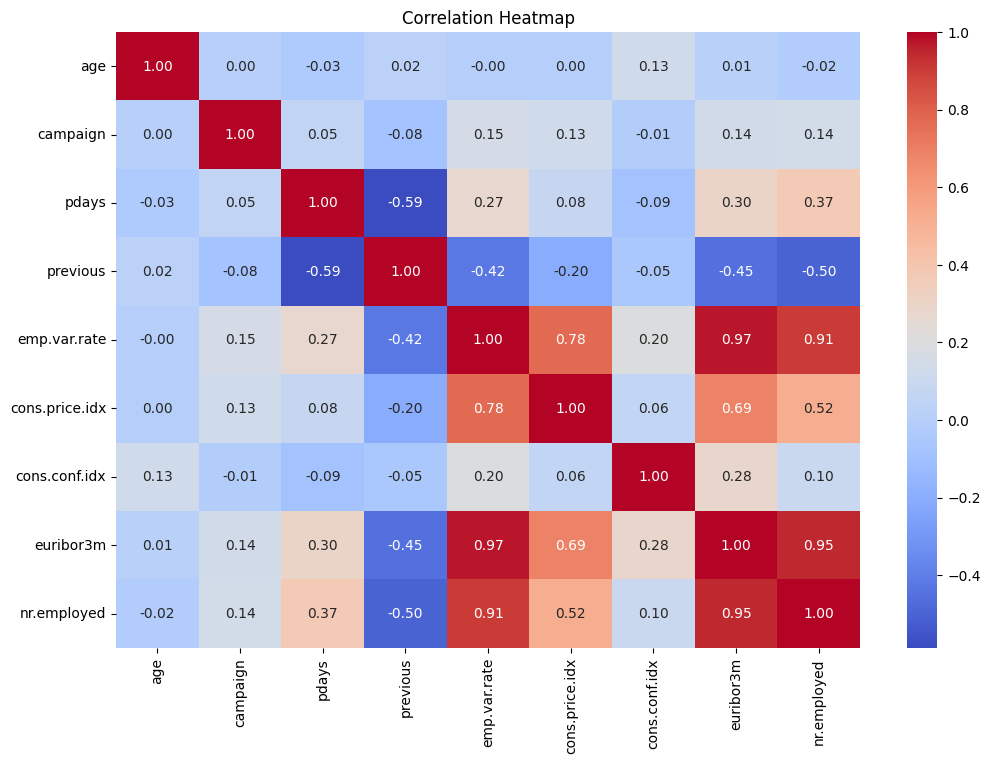

In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

data[numerical_columns] = scaler.fit_transform(data[numerical_columns]) # Apply normalization to numerical columns

print(data[numerical_columns].head())


        age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0  0.481481       0.0    1.0       0.0        0.9375        0.698753   
1  0.493827       0.0    1.0       0.0        0.9375        0.698753   
2  0.246914       0.0    1.0       0.0        0.9375        0.698753   
3  0.283951       0.0    1.0       0.0        0.9375        0.698753   
4  0.481481       0.0    1.0       0.0        0.9375        0.698753   

   cons.conf.idx  euribor3m  nr.employed  
0        0.60251   0.957379     0.859735  
1        0.60251   0.957379     0.859735  
2        0.60251   0.957379     0.859735  
3        0.60251   0.957379     0.859735  
4        0.60251   0.957379     0.859735  


In [12]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [13]:
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(data[col].value_counts())


Unique values in 'job':
job
admin.           10418
blue-collar       9252
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
other              330
Name: count, dtype: int64

Unique values in 'marital':
marital
married     24999
single      11564
divorced     4611
Name: count, dtype: int64

Unique values in 'education':
education
university.degree      12163
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4175
basic.6y                2291
other                   1730
illiterate                18
Name: count, dtype: int64

Unique values in 'housing':
housing
yes    22560
no     18614
Name: count, dtype: int64

Unique values in 'loan':
loan
no     34926
yes     6248
Name: count, dtype: int64

Unique values in 'contact':
contact
cellular     26134
telephone    15040
Name: 

In [14]:
education_order = {
    "illiterate": 0,
    "basic.4y": 1,
    "basic.6y": 2,
    "basic.9y": 3,
    "high.school": 4,
    "professional.course": 5,
    "university.degree": 6,
    "other": 7
}

<ipython-input-15-9538b4604e36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=feature, data=data, palette='Set3')


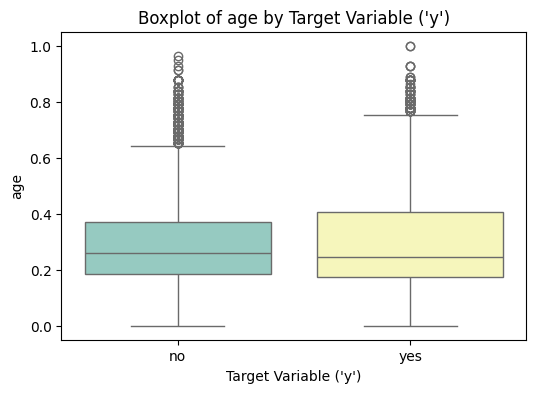

<ipython-input-15-9538b4604e36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=feature, data=data, palette='Set3')


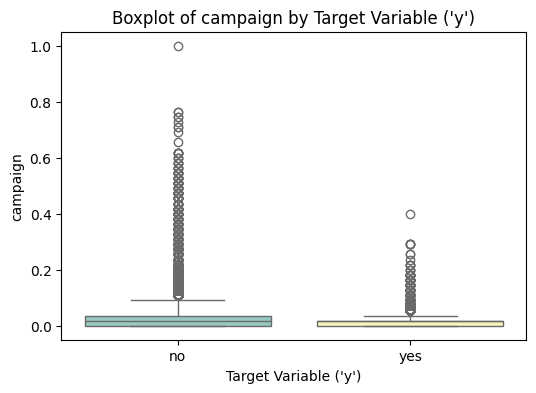

<ipython-input-15-9538b4604e36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=feature, data=data, palette='Set3')


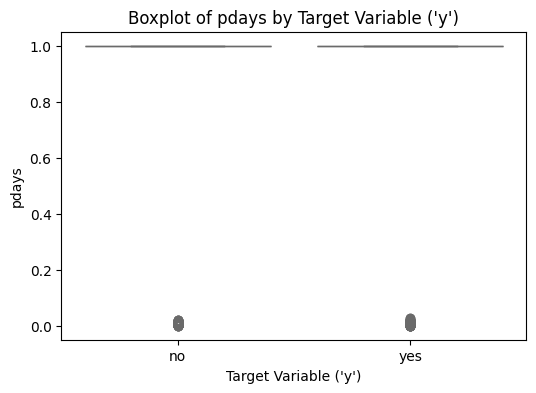

<ipython-input-15-9538b4604e36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=feature, data=data, palette='Set3')


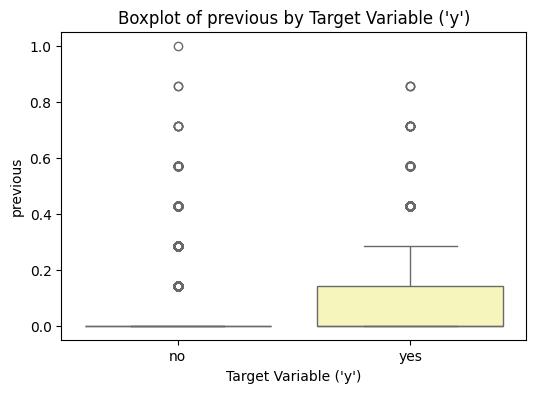

<ipython-input-15-9538b4604e36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=feature, data=data, palette='Set3')


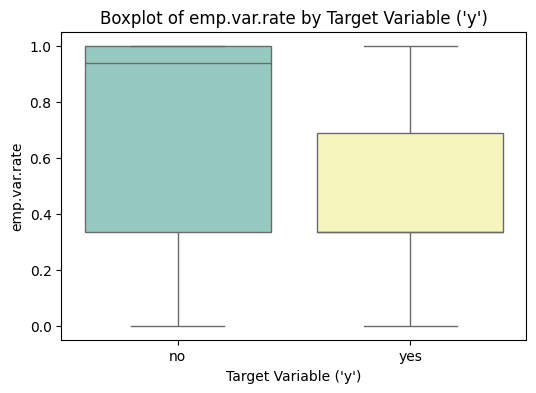

<ipython-input-15-9538b4604e36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=feature, data=data, palette='Set3')


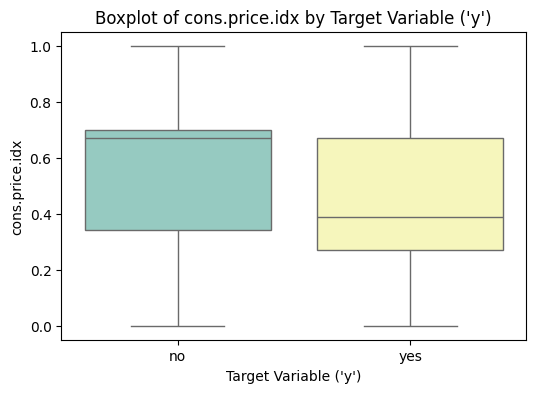

<ipython-input-15-9538b4604e36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=feature, data=data, palette='Set3')


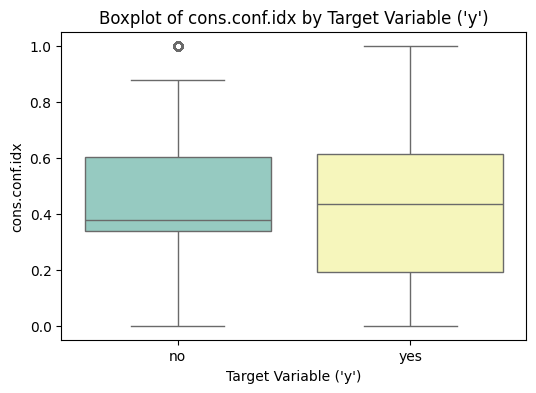

<ipython-input-15-9538b4604e36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=feature, data=data, palette='Set3')


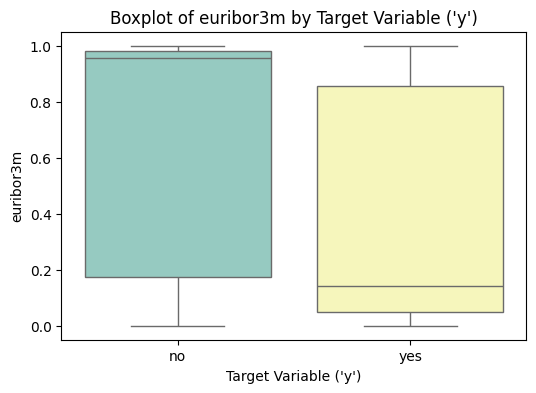

<ipython-input-15-9538b4604e36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=feature, data=data, palette='Set3')


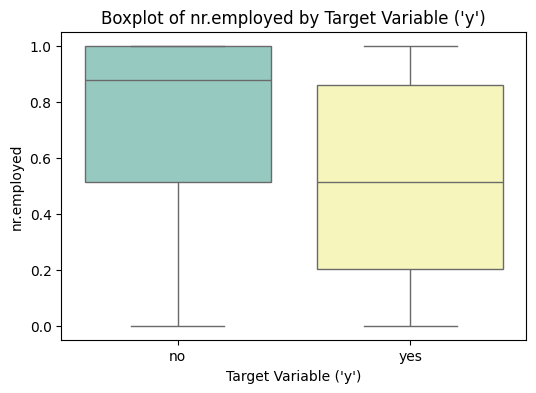

In [15]:
# Boxplot for numerical features
for feature in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='y', y=feature, data=data, palette='Set3')
    plt.title(f"Boxplot of {feature} by Target Variable ('y')")
    plt.xlabel("Target Variable ('y')")
    plt.ylabel(feature)
    plt.show()


In [16]:
# Apply label encoding for education
data['education'] = data['education'].map(education_order)
print(data['education'].head())

0    1
1    4
2    4
3    2
4    4
Name: education, dtype: int64


In [17]:
# Apply One-Hot Encoding to nominal columns
nominal_columns = ['job', 'marital', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data = pd.get_dummies(data, columns=nominal_columns, drop_first=True)

In [18]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41174 entries, 0 to 41173
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41174 non-null  float64
 1   education             41174 non-null  int64  
 2   campaign              41174 non-null  float64
 3   pdays                 41174 non-null  float64
 4   previous              41174 non-null  float64
 5   emp.var.rate          41174 non-null  float64
 6   cons.price.idx        41174 non-null  float64
 7   cons.conf.idx         41174 non-null  float64
 8   euribor3m             41174 non-null  float64
 9   nr.employed           41174 non-null  float64
 10  y                     41174 non-null  object 
 11  job_blue-collar       41174 non-null  bool   
 12  job_entrepreneur      41174 non-null  bool   
 13  job_housemaid         41174 non-null  bool   
 14  job_management        41174 non-null  bool   
 15  job_other          

In [19]:
print(data.head())

        age  education  campaign  pdays  previous  emp.var.rate  \
0  0.481481          1       0.0    1.0       0.0        0.9375   
1  0.493827          4       0.0    1.0       0.0        0.9375   
2  0.246914          4       0.0    1.0       0.0        0.9375   
3  0.283951          2       0.0    1.0       0.0        0.9375   
4  0.481481          4       0.0    1.0       0.0        0.9375   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ... month_may  \
0        0.698753        0.60251   0.957379     0.859735  ...      True   
1        0.698753        0.60251   0.957379     0.859735  ...      True   
2        0.698753        0.60251   0.957379     0.859735  ...      True   
3        0.698753        0.60251   0.957379     0.859735  ...      True   
4        0.698753        0.60251   0.957379     0.859735  ...      True   

   month_nov  month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0      False      False      False             True            False   
1 

In [22]:
data.to_csv("/content/drive/MyDrive/MLCW/preprocessed.csv", index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


# Split Dataset

In [20]:
X = data.drop('y', axis=1)  # Drop the target column from features
y = data['y']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size (X_train):", X_train.shape)
print("Test set size (X_test):", X_test.shape)
print("Training set size (y_train):", y_train.shape)
print("Test set size (y_test):", y_test.shape)

Training set size (X_train): (32939, 41)
Test set size (X_test): (8235, 41)
Training set size (y_train): (32939,)
Test set size (y_test): (8235,)


In [23]:
print("Training set target distribution:")
print(y_train.value_counts(normalize=True))

print("Test set target distribution:")
print(y_test.value_counts(normalize=True))

Training set target distribution:
y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64
Test set target distribution:
y
no     0.88731
yes    0.11269
Name: proportion, dtype: float64


In [24]:
print(y_train)
print(y_test)

1572      no
28767     no
25931    yes
27015     no
11758     no
        ... 
22252     no
37081    yes
8293      no
32680     no
33049     no
Name: y, Length: 32939, dtype: object
12462    no
11184    no
29694    no
28919    no
6872     no
         ..
35300    no
29537    no
1802     no
84       no
11146    no
Name: y, Length: 8235, dtype: object


In [25]:
data.head()

,age,education,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.481481,1,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,True,False,False,False,True,False,False,False,True,False
1,0.493827,4,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,True,False,False,False,True,False,False,False,True,False
2,0.246914,4,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,True,False,False,False,True,False,False,False,True,False
3,0.283951,2,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,True,False,False,False,True,False,False,False,True,False
4,0.481481,4,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,True,False,False,False,True,False,False,False,True,False


In [26]:
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

print(y_train.value_counts())
print(y_test.value_counts())

y
0    29228
1     3711
Name: count, dtype: int64
y
0    7307
1     928
Name: count, dtype: int64


In [27]:
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Missing values in X_train: 0
Missing values in X_test: 0
X_train shape: (32939, 41)
X_test shape: (8235, 41)


In [31]:
# Save the datasets
X_train.to_csv("/content/drive/MyDrive/MLCW/X_train.csv", index=False)
X_test.to_csv("/content/drive/MyDrive/MLCW/X_test.csv", index=False)
y_train.to_csv("/content/drive/MyDrive/MLCW/y_train.csv", index=False)
y_test.to_csv("/content/drive/MyDrive/MLCW/y_test.csv", index=False)

print("Datasets saved successfully!")

Datasets saved successfully!


# balance y value

In [29]:
# class distribution
print(data['y'].value_counts(normalize=True))

y
no     0.887332
yes    0.112668
Name: proportion, dtype: float64


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-31-ae88a360bafe>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='viridis')


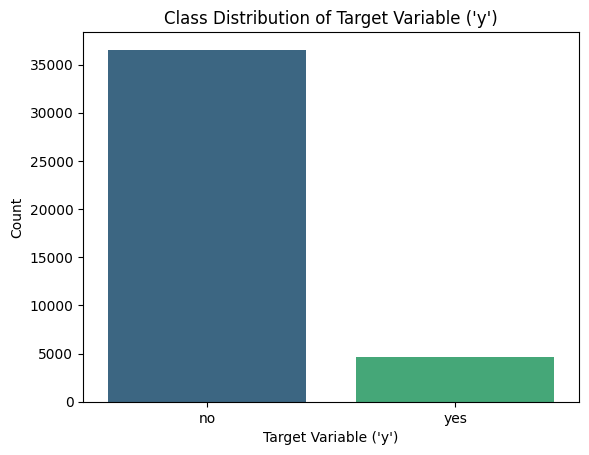

In [31]:
sns.countplot(x='y', data=data, palette='viridis')
plt.title("Class Distribution of Target Variable ('y')")
plt.xlabel("Target Variable ('y')")
plt.ylabel("Count")
plt.show()


In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [35]:
print("Class distribution after SMOTE:", dict(pd.Series(y_resampled).value_counts()))

Class distribution after SMOTE: {0: 29228, 1: 29228}


In [36]:
from imblearn.over_sampling import RandomOverSampler

In [37]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Check the new distribution
print("Class distribution after Random Oversampling:", dict(pd.Series(y_resampled).value_counts()))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Class distribution after Random Oversampling: {0: 29228, 1: 29228}


In [38]:
print("Class distribution after resampling:", dict(pd.Series(y_resampled).value_counts()))

Class distribution after resampling: {0: 29228, 1: 29228}
